In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:21:33,475] A new study created in memory with name: no-name-8924de25-e7a4-4ea8-96b9-c8838fcaa1c6
[I 2025-04-27 11:21:33,521] Trial 0 finished with value: 0.9473684210526315 and parameters: {'C': 63.474665582045965, 'kernel': 'rbf', 'gamma': 0.0006050260806912024, 'max_iter': 1445}. Best is trial 0 with value: 0.9473684210526315.
[I 2025-04-27 11:21:33,559] Trial 1 finished with value: 0.6736842105263158 and parameters: {'C': 1.3193849324370213, 'kernel': 'poly', 'gamma': 0.044716839206717304, 'degree': 4, 'max_iter': 7729}. Best is trial 0 with value: 0.9473684210526315.
[I 2025-04-27 11:21:33,593] Trial 2 finished with value: 0.6263157894736843 and parameters: {'C': 1.2714212716641073, 'kernel': 'poly', 'gamma': 0.0012449517950442871, 'degree': 5, 'max_iter': 901}. Best is trial 0 with value: 0.9473684210526315.
[I 2025-04-27 11:21:33,611] Trial 3 finished with value: 0.9578947368421054 and parameters: {'C': 0.13253505812176622, 'kernel': 'linear', 'max_iter': 4641}. 

Best trial:
Accuracy: 0.9842105263157895
Best hyperparameters:  {'C': 0.38330287603571583, 'kernel': 'linear', 'max_iter': 6461}


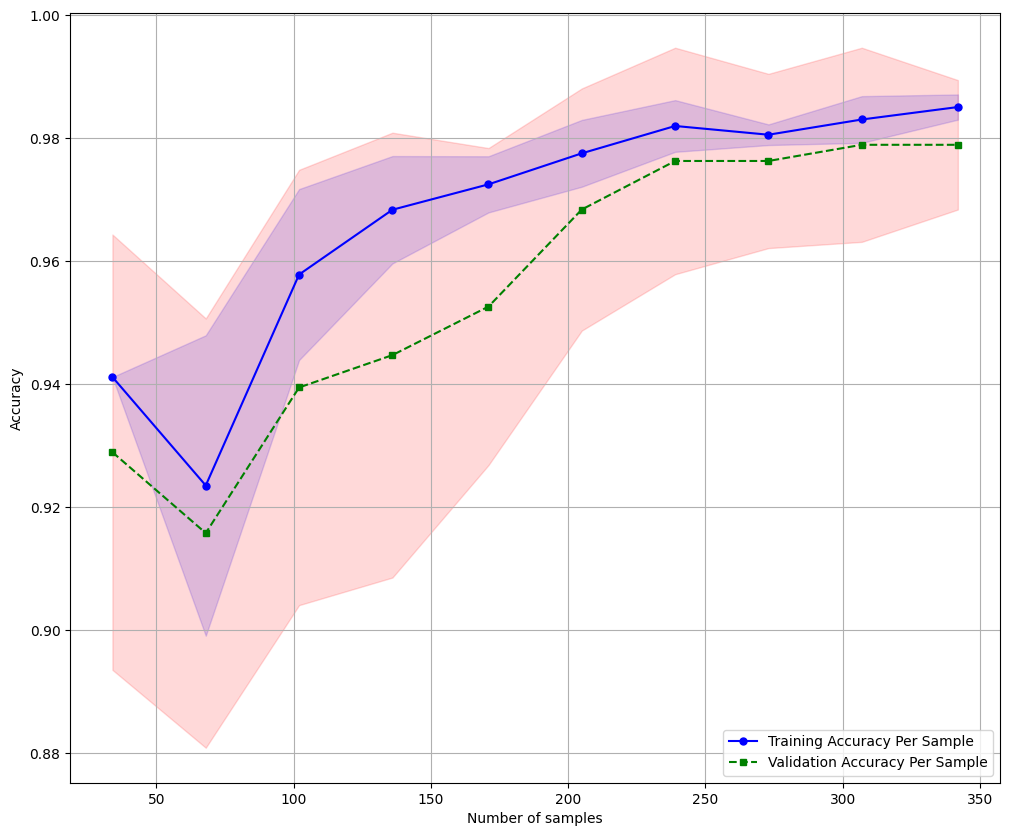

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9931


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)